<a href="https://colab.research.google.com/github/manthra16695/Code-360/blob/main/ANOVA_Day8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import seaborn as sns
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


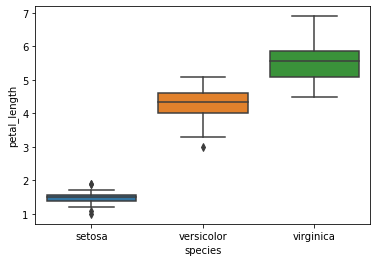

In [5]:
# df.boxplot(df['petal_length'],by=df['species'])
sns.boxplot(x=df['species'],y=df['petal_length'])


In [18]:
#ANova test
from scipy import stats

setosa=df['petal_length'][df['species']=='setosa']
versicolor=df['petal_length'][df['species']=='versicolor']
virginica=df['petal_length'][df['species']=='virginica']

# stats.f_oneway(setosa[''],versicolor,virginica)



In [23]:
p_value=stats.f_oneway(setosa,versicolor,virginica)

In [24]:
p_value

F_onewayResult(statistic=1180.161182252981, pvalue=2.8567766109615584e-91)

In [32]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model=ols('petal_length~species',data=df).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
species,2.0,437.1028,218.551400,1180.161182,2.856777e-91
Residual,147.0,27.2226,0.185188,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
setosa,versicolor,2.798,0.001,2.5942,3.0018,True
setosa,virginica,4.09,0.001,3.8862,4.2938,True
versicolor,virginica,1.292,0.001,1.0882,1.4958,True


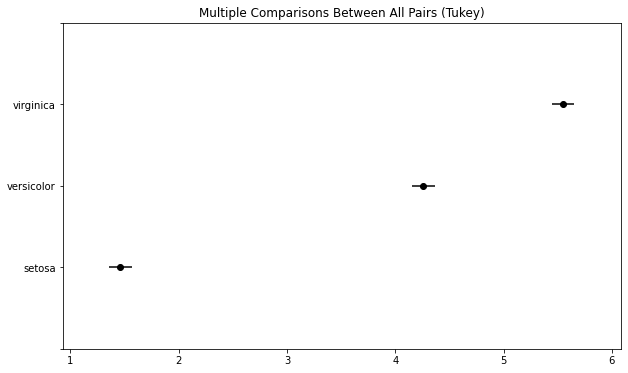

In [41]:
##TO see which group is creating significance we use Tukey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey=pairwise_tukeyhsd(endog=df['petal_length'],groups=df['species'],alpha=0.05 )
tukey.plot_simultaneous()
tukey.summary()